# Linear Regression in Practice


## Background

**Regression problems** are supervised learning problems in which the target output variable is continuous. Contrast this with **Classification problems** (which we will treat separately), which are supervised learning problems in which the target is categorical in nature. 

**Linear regression** is a technique that is useful for regression problems. It is a simplistic way to model relationships with well known results (if certain assumptions are met).

So, why are linear regression models useful in practice?

- runs fast
- easy to use (not a lot of tuning required)
- highly interpretable
- sets a good benchmark for other machine learning methods

## Libraries

We'll be using the [scikit-learn](http://scikit-learn.org/stable/) library for prediction and analysis of the models. 

We will also be using pandas library and some plotting tools for exploratory data analysis and data cleaning. 

In [1]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

# allow plots to appear directly in the notebook
%matplotlib inline
sns.set()

## Case Study: Advertising Data

Let's explore some data related to marketing and sales, and then use linear regression to answer those questions!

In [4]:
# read data into a DataFrame

## Recall that pandas.read_csv is a function that loads data into a dataframe. 
## The data can be represented as a file on your computer or even a file that can be pulled from an online source.

data = pd.read_csv('Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


What are the **features** (i.e the predictor/input variables)?
- TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: advertising dollars spent on Radio
- Newspaper: advertising dollars spent on Newspaper

What is the **response** (i.e the target/output variable)?
- Sales: sales of a single product in a given market (in thousands of widgets)

### Exploratory Data Analysis

Let's get a summary of the data and all the nuances:

In [38]:
# print the shape of the DataFrame
data.shape

(200, 4)

In [39]:
# Get a high level overview of the data:
## Information includes column name, column types and any potential missing values.

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [40]:
# Get a high level summary of each column

## Since the columns are numeric in nature, we can get a summary of aggregates for each column.

data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


There seem to be no missing values and no illogical values (i.e negative quantities), which is a good sign of a clean dataset.

Let's now use some plots to visualise the dataset:

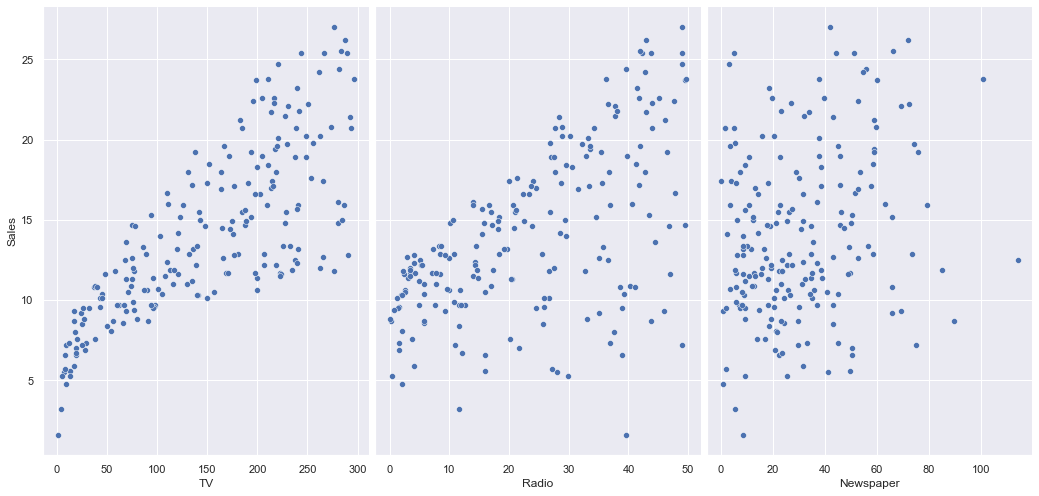

In [5]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=7, aspect=0.7, diag_kind = None);

What can you tell from this dataset so far?

## Questions About the Advertising Data

Let's pretend you work for the company that manufactures and markets this widget. The company might ask you the following: On the basis of this data, how should we spend our advertising money in the future?

This general question might lead you to more specific questions:
1. Is there a relationship between ads and sales?
2. How strong is that relationship?
3. Which ad types contribute to sales?
4. What is the effect of each ad type of sales?
5. Given ad spending in a particular market, can sales be predicted? To what degree of error?

We will explore these questions below!

Given that the diagrams above show some kind of correlation between sales and money spent on advertising, we can try to model a linear relationship between sales and the different types of ad spending:

## Simple Linear Regression

Recall we can impose a linear regression model for predicting the (continous) **response** using the **predictor variables** (or "input variables"). It takes the following form:

$y^{pred}_i = \sum_{j=0}^{k} \beta_jX_{ij}$

Where the representation of the terms are as follows:
- $y_i$ is the response of the $i$th observed variable
- $X_{ij}$ corresponds to the $j$th predictor value of the $i$th observed set of predictors
- $\beta_0$ is the intercept, (and $X_{i0}$ is fixed to be 1 for all $i$)
- $\beta_j$ are the coefficients for each predictor.
- Also, assume that there are $k$ predictors. In the setup for the marketing data, $k = 3$

Together, the $\beta_i$ are called the **model coefficients**. To create your model, you must "learn" the values of these coefficients. And once we've learned these coefficients, we can use the model to predict Sales!

Recall as well we are trying to minimise the MSE with the gradient descent algorithm. Rather than trying to put the entire specification of the model into code ourselves, we can take advantage of the `scikit-learn` library to do so:

In [18]:
# create X and y
feature_cols = ['TV']
X = data.loc[:,feature_cols]
y = data.loc[:,"Sales"]

# instantiate and fit
lm = LinearRegression()
lm.fit(X.values, y)

# print the coefficients
print(lm.intercept_)
print(lm.coef_)

7.032593549127693
[0.04753664]


### Using the Model for Prediction

Let's say that there was a new market where the TV advertising spend was **$100,000**. What would we predict for the Sales in that market?

$$y = \beta_0 + \beta_1x$$
$$y = 7.032594 + 0.047537 \times 100$$

#### Prediction using `sklearn`

In [23]:
x = np.array([[100]])

In [24]:
# predict for a new observation
lm.predict(x)

array([11.78625759])

Using the linear model, we would predict the sales of **11,786 widgets** in that market.

### Revisiting Least Squares Line

As a matter of fact, seaborn has built in regression plots that gives us the least squares line automatically for the target versus each of the predictors:

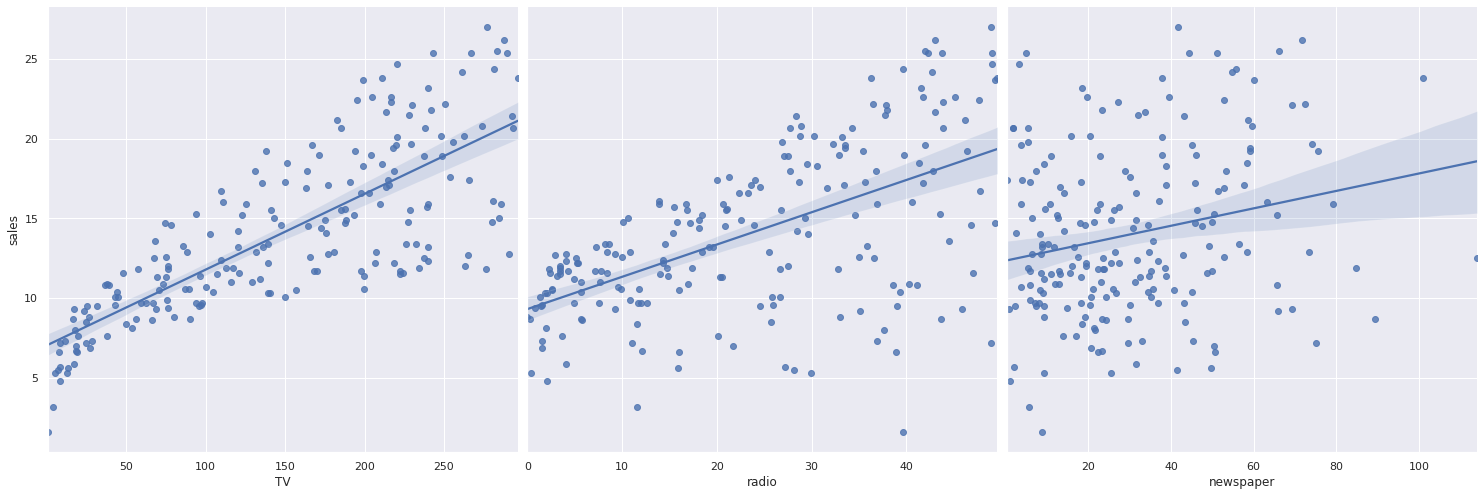

In [44]:
sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars='sales', height=7, aspect=1, kind='reg', diag_kind=None);


Note that in the plots above, the shaded regions represent the confidence intervals of the estimates. One can observe that regions where there is a high density of observations correspond to tighter confidence bounds for the estimates and vice versa for areas of lower observation density. Spread of the data points around the prediction line affects the confidence interval as well. This naturally brings us to ask the question, how well does my model perform?

## How Well Does the Model Fit the data?


#### Model Evaluation Metrics: MSE

Recall that we had come up with the following evaluation metrics when discussing the objective function:

- **Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

- **Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

We can leverage on the `sklearn` library to help us obtain these calculations instead of doing them manually:

In [45]:
from sklearn.metrics import mean_squared_error

# define true and predicted response values
y_true = [100, 50, 30, 20]
y_pred = [90, 50, 50, 30]

# calculate MSE, RMSE

print(metrics.mean_squared_error(y_true, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_true, y_pred)))

150.0
12.24744871391589


Checking the MSE and rMSE for the predictions give:

In [46]:
y_pred = lm.predict(X)

print(metrics.mean_squared_error(y, y_pred))
print(np.sqrt(metrics.mean_squared_error(y, y_pred)))

10.512652915656757
3.2423221486546887


The MSE "punishes" deviations from the true values. In practice, the rMSE is a more popular metric than MSE because rMSE is interpretable in scale of the actual target values.


#### Model Evaluation Metrics: The R-Squared

Another common way to evaluate the overall fit of a linear model is using the R-squared value. R-squared is the proportion of variance of the data explained, meaning the proportion of variance in the observed data that is explained by the model, on the estimation of the natural variance of the observed $y$ values. 

It is defined by the following formula:

  $$
  R^2 = 1 - \frac{\sum_i (y_i - \hat{y}_i)^2}{\sum_i (y_i - \bar{y})^2}
  $$

The higher the $R^2$ the more indicative that the model has a better fit on the data.


Let's calculate the R-squared value for our simple linear model:


You can use the built in methods in `sklearn` to compute the $R^2$ score too:

In [47]:
# print the R-squared value for the model
lm.score(X, y)

0.611875050850071

Is that a "good" R-squared value? It's hard to say. The threshold for a good R-squared value depends widely on the domain. Rather, it's more useful as a tool for comparing different models.

#### Increasing Model Fit (and Caveats)

The $R^2$ statistic usually increases every time you add an **independent** variable to the model.

A regression model that contains more independent variables than another model can look like it provides a better fit merely because it contains more variables.

Let's see an example below, we will consider the full linear model as compared to a linear with a single predictor variable.

In [48]:
# create X and y

X_all = data.drop(["sales"],axis=1)
y_all = data.loc[:,"sales"]

# instantiate and fit
lm_all_sklearn = LinearRegression()
lm_all_sklearn.fit(X_all, y_all)

#Check the r-squared score
lm_all_sklearn.score(X_all,y_all)


0.8972106381789521

When a model contains an excessive number of independent variables, it becomes overly customized to fit the peculiarities and random noise in your sample rather than reflecting the entire population. Thus, blindly chasing a high $R^2$ value might lead to some very misleading results. 

This is known as *overfitting*, which means that the model might have been overspecified to the data used to train the model leading to good results for that particular data but a decreased capability for precise predictions on data the model has not "seen" before.

There is an alternative to R-squared called [adjusted R-squared](https://www.statisticshowto.com/adjusted-r2/) which penalizes model complexity (to control for overfitting), but it generally under-penalizes complexity - as such we will not go into the specifics here. We will explore a more robust method to diagnose overfitting.



### Summary

So far, we have implemented Linear Regression on the following:

1. Using a single predictor.
2. Using all available predictors.

Which led to varying results. 

There are many more statistics (which are out of scope of this tutorial) that can be used to evaluate a goodness of fit on the data.

It can be surmised that the full Linear Regression model does better in terms of fitting the data but is this truly the case?

## Exploring the Bias-Variance Tradeoff

As we have seen before, measuring the performance of the model depends on the metric that we use. In general, the choice of an appropriate metric heavily depends on the problem.

- In the case of predictive modelling in regression as we have seen above, we could gauge whether the model performs well by measuring the prediction error. In the raw form this could be represented by the MSE or we could use the $R^2$ score.
- In the case where we might be more interested in inference, we may be more interested in the statistical properties of the parameter estimates, although this requires more assumptions on the model and the data to hold.

So far, we have setup the machine learning problem such that we seek to find the parameter values that minimise the MSE. The key fact in this set up is that we are aiming to reduce the MSE for data that is **observed**.

However, what a truly performant model seeks to achieve is not just the best predictions (i.e lowest MSE) on observed data, but rather the true value of the model comes from being able to make good predictions on data that is unseen. That is, we want to be able to make good **out-of-sample** predictions. 

*Remark: The concept of out-of-sample errors will be further elucidated in another section. Right now we will talk about errors generally.*

When considering model performance characteristics, there are facets that are impacted by the choice of the model:

  - **Bias**: This can be thought of as the error caused by the simplifying assumptions built into the method. E.g., when approximating a non-linear function using a learning method for linear models, there will be error in the estimates due to this assumption. Models with high bias are, loosely speaking, said to *underfit* the data.
  
  - **Variance**: This can be understood as a measure of the amount that the estimate of the target function will change if different training data was used. Models with high variance are said to *overfit* the data.

We want to find a model that minimises both bias and variance. However there is often a trade-off.

Let's consider the following examples to see how bias and variance can change depending on the model chosen:

#### Case 1: Bias and Variance for a Simple Linear Model

In [49]:
# Let's generate some predictor, X values and have the y values depend on them somewhat non-linearly:

np.random.seed(12345)

X_gen = np.random.random(300)*10
y_gen = (np.sin(X_gen) + np.random.normal(scale=1,size=X_gen.size))

In [56]:
X_gen = np.array([0, 1, 2])
y_gen = np.array([0, 1, 4])

In [55]:
df.unstack()

0    0    9.296161
1    0    3.163756
2    0    1.839188
3    0    2.045603
4    0    5.677250
            ...   
295  0    1.371371
296  0    9.994142
297  0    5.073272
298  0    4.930667
299  0    1.868748
Length: 300, dtype: float64

In [ ]:
x_gen = np.array()

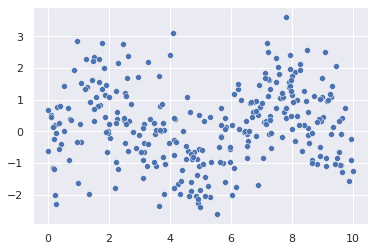

In [17]:
# Visualise the results of the generated data

sns.scatterplot(x=X_gen,y=y_gen)

Now, let's use a linear model to make predictions.

In [18]:
# Use a simple Linear Regression model to make predictions

lm_gen = LinearRegression()

lm_gen.fit(X_gen[:,np.newaxis],y_gen)

predictions_gen = lm_gen.predict(X_gen[:,np.newaxis])

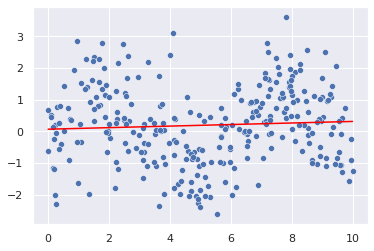

In [19]:
# Plot the model on a scatterplot

# Either plot the scatterplot manually or use the lmplot from seaborn

# Manual Version
fig,ax = plt.subplots(1,1)
sns.scatterplot(x=X_gen,y=y_gen,ax=ax)
sns.lineplot(x=X_gen,y=predictions_gen,ax=ax, color="red")

In [20]:
# Measure the R-Squared of the linear regression model on the given data

lm_gen.score(X_gen[:,np.newaxis],y_gen)

0.003319582591887693

How would you evaluate the Linear Regression model's performance in this setting?

In this context we have data where the target/response variable is related to the predictor variables in a non-linear fashion (by design). By using a Linear Model in this case we are imposing the assumption that the variables ARE indeed linearly dependent. 

This mismatch of the assumption with reality leads to misleading results. The linear model fails to capture the essence of this information simply due to the fact that we are missing on other factors that explain this variation. In this instance, we say that the model has *high bias* or has *underfit* the (observed) data.

In order to make sense of the model variance, one needs to consider what happens when the model has been trained on different sets of data. Let's 

In [21]:
# Use the generated data as before. Except now we will generate two independent sets of data.

np.random.seed(12345)

X_gen_1 = np.random.random(300)*10
X_gen_2 = np.random.random(300)*10
y_gen_1 = (np.sin(X_gen_1) + np.random.normal(scale=1,size=X_gen_1.size))
y_gen_2 = ( np.sin(X_gen_2) + np.random.normal(scale=1,size=X_gen_2.size))


In [22]:
# Combine the two sets of data into a dataframe and add a new column indicate the group membership for each datapoint

X_gen_full = np.concatenate([X_gen_1,X_gen_2]).reshape(-1,1)
X_class = np.concatenate([np.repeat(1,X_gen_1.size),np.repeat(2,X_gen_2.size)]).reshape(-1,1)

y_gen_full = np.concatenate([y_gen_1,y_gen_2]).reshape(-1,1)


gen_data = pd.DataFrame(data=np.concatenate([X_gen_full,y_gen_full,X_class],axis=1),columns=["X","y","Group"])

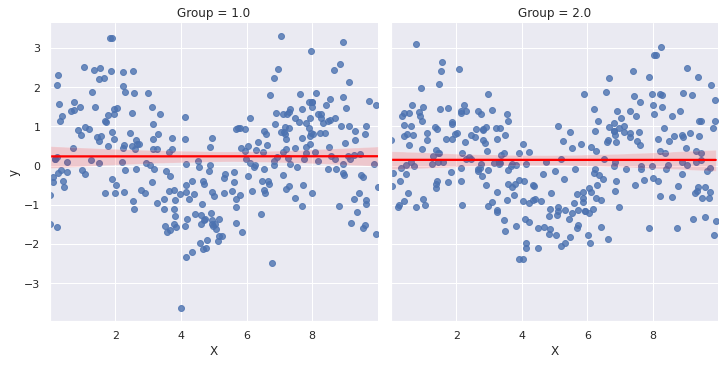

In [23]:
# Plot the generated data on two separate grids and facet by group


sns.lmplot(x="X",y="y",col="Group",data=gen_data,line_kws={'color': 'red'})


The line looks pretty similar between the two plots, despite the fact that they used separate samples of data.



It's easier to see the degree of similarity by placing them on the same plot:

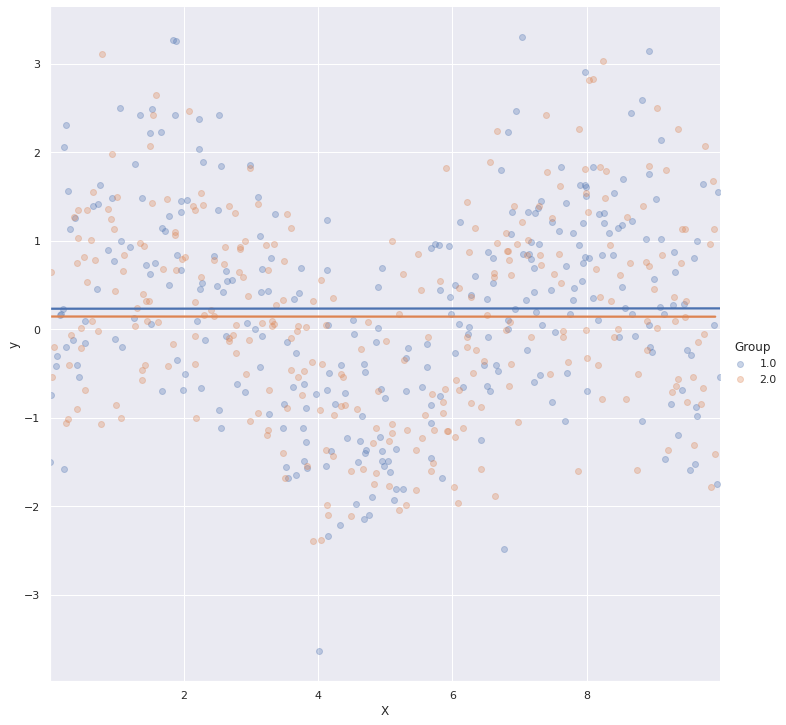

In [24]:
# hue='sample' subsets the data by sample and creates a single plot


sns.lmplot(x='X', y='y', data=gen_data, ci=None, hue='Group', scatter_kws={'alpha':0.3}, height=10,aspect=1);


Although the slopes of the lines are slightly different, the model predictions do not vary too wildly from each other, which is good indication of a model variance that is not too high.

#### Case 2: Bias and Variance for a slightly more complex model.

What would a low bias, high variance model look like? Let's consider a linear model with fifteen terms, with each term being the predictor raised to a higher power. This is known as polynomial regression, in particular an fifteenth order polynomial represented by:

$$
y^{pred} = \sum_{j=0}^{15} \beta_{j}x^{j}
$$

This is still a linear model (w.r.t. $\beta$) but with added complexities due to considering higher order transformations of the predictor. We will not be going through this model in detail but this is just an extension of the simple Linear Regression to account for potential non-linearity in the terms.

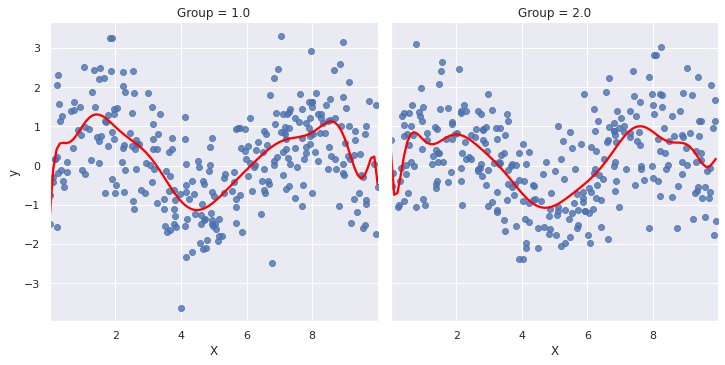

In [25]:

sns.lmplot(x='X', y='y', data=gen_data, ci=None, col='Group', order=15,line_kws={'color': 'red'});

What can we observe from the plots above?

- The model seems to be attuned to the general shape (or pattern of the data).
- Remember, the errors of prediction have a systematic component to it, and in our case the irreducible errors due to the natural variance of the data seems to quite large.
- Because it fits the general shape of the data better than the simple linear model, we can loosely say it has lower *bias*.
- However, the shapes of the model trained on the different samples data are very different in terms of the shapes. This is a clear indication of a large model variance. 


#### The Lowdown

So, what was the point of this exercise? This was a visual demonstration of how the bias and variance changes with model complexity. In the examples above, we compared the bias and variance (loosely speaking) by at plots of a simple linear model with one slope parameter versus a more complex polynomial model that attempts to model non-linearity. 

In the demonstration above we can infer that the bias and variance of a model usually depend on the complexity of a model in the following ways:

- Bias decreases with complexity.
- Variance increases with complexity.

This relationships is a rule of thumb rather than a formalism. Sometimes you can have a complex model with extremely high bias and variance and vice versa, although this cases are much more rare. 

In the case where we elect to use the Simple Linear Regression model, we have:

  - High bias because it doesn't fit the data particularly well. 
  - Low variance because it doesn't change much depending upon which points happen to be in the sample.



#### The Tradeoff

In general if the model is too simplistic and has very few parameters, it will not be able to account for all the variances in the data. On the other hand, if our model has too large a number of parameters then, it might start to model the errors in the data itself - thus giving a high variance. However because of the larger number of parameters, we may find ourselves with a model that is more able to explain the relationships in the data better. 

The objective of machine learning is to find a model specification that is subject to the a good balance of bias and variance. Thus, we aim to try to find the model with a complexity within a goldilocks zone:

<figure> 
<img src="https://miro.medium.com/max/1124/1*RQ6ICt_FBSx6mkAsGVwx8g.png">
<div style="text-align:center;">
<figcaption > Source: Seema Singh </figcaption> </div>
</figure>




## Generalisation and Feature Selection


Let's go back to our original problem with the sales data. We seek a model with a good feature set capable learning from the data and making the best predictions. In other words, the feature set should describe the data well, without attuning itself to any irrelevant noise. The question then becomes, how do I decide which features to include in a linear model to make it predict well?

First up, how do we tell if it is able to predict well?

So far, we have only seen and evaluated the models on the *observed* data. But the true indication of the model's performance only comes in evaluating on data that is unseen.

In other words, does it generalise well? Or did the model simply memorise the data points it has seen?

### Splitting the Data


How do we then evaluate the model on unseen data? An obvious method would be to go and collect new data points. But if that is not possible, a trick we can use it to split the data into two. 

By splitting the data into what we call a training set and a testing set, we can train the model on the former and evaluate it on the latter. The testing or test set is a proxy to any future data that we want to make predictions on.

This is paradigm provides more reliable estimate of out-of-sample error, and thus are better for choosing which of your models will best generalize to out-of-sample data - which in turns measures the variance of the model.

More importantly, the idea of data splitting can be applied to any model to measure generalisation errors. Many of the statistics described above (in the model summary) apply only to linear models with certain assumptions.

#### Train-Test Split

Let's use train/test split with RMSE to see whether certain predictors should be kept in the model. The `sklearn` utilities allow us to easily split the data by random sampling.

*Without Splitting*

In [26]:
# excluding newspaper
X = data[['TV', 'radio']]
y = data["sales"]

lm_full = LinearRegression()
lm_full.fit(X, y)
y_pred = lm_full.predict(X)
print(f"rMSE: {np.sqrt(metrics.mean_squared_error(y, y_pred))}")
print(f"r2: {np.sqrt(metrics.r2_score(y, y_pred))}")

rMSE: 1.6687030593661927
r2: 0.9472033895013762


In [27]:
# including newspaper
X = data[['TV','newspaper','radio']]
y = data["sales"]

lm_full = LinearRegression()
lm_full.fit(X, y)
y_pred = lm_full.predict(X)
print(f"rMSE: {np.sqrt(metrics.mean_squared_error(y, y_pred))}")
print(f"r2: {np.sqrt(metrics.r2_score(y, y_pred))}")

rMSE: 1.6685701407225697
r2: 0.9472120344352432


You can see that adding the extra term causes the rMSE to decrease (which is desirable) but only by a miniscule amount. Does this necessarily mean it is a good predictor?

*With Splitting*

The `train_test_split` function is a data transformer that splits the data randomly and returns a tuple of four values:

- The training set of predictor variables : `X_train`
- The training set of target variables : `y_train`
- The test set of predictor variables : `X_test`
- The test set of target variables : `y_test`

You can specify the proportions of the splits the function parameters described in the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [28]:
# excluding newspaper
X = data[['TV', 'radio']]
y = data["sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

lm_full = LinearRegression()
lm_full.fit(X_train, y_train)
y_pred = lm_full.predict(X_test)
print(f"rMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")
print(f"r2: {np.sqrt(metrics.r2_score(y_test, y_pred))}")

rMSE: 1.3879034699382888
r2: 0.9579256204032183


In [29]:
# including newspaper
X = data[['TV','newspaper','radio']]
y = data["sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
lm_full = LinearRegression()
lm_full.fit(X_train, y_train)
y_pred = lm_full.predict(X_test)
print(f"rMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")
print(f"r2: {np.sqrt(metrics.r2_score(y_test, y_pred))}")

rMSE: 1.4046514230328957
r2: 0.9568810591600313


In this case, the rMSE actually increased from adding the newspaper predictor.

The above analysis makes the case that maybe the newspaper predictor has no bearing on the sales of the widgets.

Remember, always test your model on data that have not been used for training! This is known as the *out-of-sample* data. By testing your model on *out-of-sample* data, you are evaluating the generalisation ability of the model.

For the model to perform well, it needs to be tested on unseen data. This is known as the *generalisation* ability of the model. 

**To learn, is to generalise.**

#### Feature Engineering

Using the available data to perform machine learning is the preliminary step. However, there are many ways of improving the performance through clever manipulation of the data. This is known as feature engineering.

More formally, feature engineering is defined as the process of using domain knowledge to extract features from raw data via data mining techniques. These features can be used to improve the performance of machine learning algorithms. Feature engineering is constantly used in practice and is a large domain in the field of applied machine learning.

Ultimately, it goes without saying that the model's features influence the performance more than any other factor. In practice, the choice of models, along with the specification of the algorithm plays second fiddle to the information gain given by correct feature engineering.


There are multiple ways of engineering features:

- One method of doing so would be to create new and relevant data using domain knowledge.
- Another method would be performing transformation on the exist data. Note that there may be many transformations that one can use and there is no particular set of directives that will give you a good result. Hence it is a good idea to try many transformations and test them.

We will look at a particular set of transformations to introduce some non-linearity into our model. Recall that a polynomial regression model can be expressed as a model with parameters for each predictor term raised to the $nth$ power. We can implement such a model as follows:

Recall, we need to split the dataset up in order to test the model on out-of-sample data.

In [30]:
# Split the data into training and test sets

X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(X_all,y_all,random_state=12345)

Now let's perform some transformations on the data such that we can have extra terms:

In [31]:
# The trick is to augment the dataset using polynomial terms. This can be done with sklearn's preprocessing module

from sklearn.preprocessing import PolynomialFeatures

# Instantiate the PolynomialFeatures Transformer
poly = PolynomialFeatures(degree=2) # The transformer will create terms up to the 2nd power as well as all the interaction terms in between.

poly.fit(X_train_aug) # First, fit the polynomial transformer

aug_train = poly.transform(X_train_aug) # Transform the training set using the transformer
aug_test = poly.transform(X_test_aug) # Then, transform the test set using the transformer

poly.get_feature_names()

['1', 'x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

If we look at the feature names, you can see that there is a term that is labelled as `"1"`. This is the intercept term that the Linear Regression model will already have considered. We can therefore omit this column when training and testing our model:

In [32]:
# Get rid of the first columns for both the training and testing data

aug_train = aug_train[:,1:] 
aug_test = aug_test[:,1:]

We are now ready to perform Linear Regression with the augmented dataset:

In [33]:
# Now fit the Linear Model with the augmented dataset

lm_aug = LinearRegression()

lm_aug.fit(aug_train,y_train_aug)

# Obtain the R^2 for both training and test sets
print(f"Training Score: {lm_aug.score(aug_train,y_train_aug)}")

print(f"Test Score: {lm_aug.score(aug_test,y_test_aug)}")

Training Score: 0.9919876614787659
Test Score: 0.9688567781034298


#### Bonus Content: Qualitative Model Evaluation

As seen before, sometimes it is not enough to evaluate the model using a single metric. It is highly recommended that we look at prediction/realisation plots  in order to help us determine if indeed our model works out well for the given data.

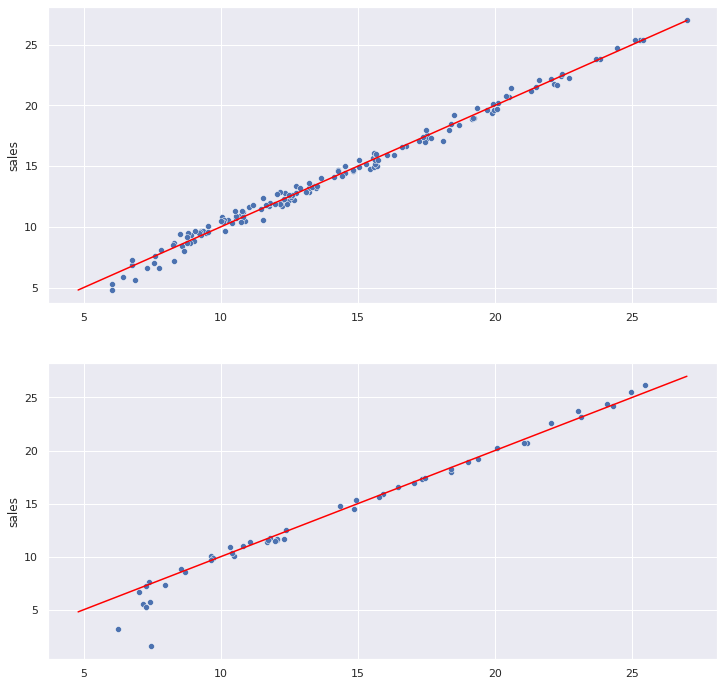

In [34]:
# Obtain the predictions

y_pred_train = lm_aug.predict(aug_train)
y_pred_test = lm_aug.predict(aug_test)


# Plot the predicted values against the actual values

fig, ax = plt.subplots(2,1,figsize=(12,12))
sns.scatterplot(x=y_pred_train,y=y_train_aug, ax=ax[0])
sns.scatterplot(x=y_pred_test, y=y_test_aug, ax=ax[1])

# Plot the line where y=x

ln = np.linspace(np.min([y_pred_train.min(),y_train_aug.min()]),np.max([y_pred_train.max(),y_train_aug.max()]),100)

sns.lineplot(x=ln,y=ln,ax=ax[0],color="red")
sns.lineplot(x=ln,y=ln,ax=ax[1],color="red")


## Conclusion

The polynomial model yields a r-squared score that is higher than that of the basic linear model with the raw predictors. The plots show that the model is a good fit as well due to the prediction points being close to the $y=x$ line - meaning that the predictions are indeed close to the actual values. 

An exercise would be to compare the out-of-sample rMSE/r-squared of the models with different permutations of the predictors to see which set of predictors yields the linear model with the best performance.

### What Didn't We Cover?

- Detecting collinearity, i.e whether predictors rely on each other
- Diagnosing model fit using statistical theory
- Transforming features to fit non-linear relationships
- Interaction terms
- More statistical assumptions of linear regression

You could certainly go very deep into linear regression, and learn how to apply it really well. It is an excellent way to **start your modeling process** when working a regression problem. Again, in the words of Yasser Abu Mostafa, a linear model will take you far.

However, it is limited by the fact that it can only make good predictions if there is a **linear relationship** between the features and the response, which is why more complex methods (but often with higher variance and lower bias) will often outperform linear regression.

Therefore, by understanding linear regression conceptually, as well as its strengths and weaknesses, you will have gained the understanding of creating a machine learning model to solve a prediction problem - which can be extended to other models in practice.